<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/Linear%20Regression/Linear_Regression_case_study_without_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Case study

## Task:
In this assignment, you will build a linear regression model using the Pune Housing dataset. Here is where you can find the dataset: https://drive.google.com/file/d/151s9UaTL88G2FR-ffHt76FNe1oWaHEbF/view?usp=sharing

Instructions: Your aim is to load the data, explore the data, preprocess the data, build and evaluate a regression model.

## 1. Problem Definition:

- The objective of this project is to analyze and predict property prices in Pune using the Pune Housing dataset extracted from MagicBricks, a platform for property buyers and sellers.
- The goal is to develop a linear regression model to estimate housing prices based on various features such as location, area, number of bedrooms, and other relevant factors.

### Task invoved in Project:
1. Data Collection
2. Data Exploration
3. Data Preprocessing
4. Data Splitting
5. Model selection
6. Model Training
7. Model Evaluation
8. Parameter Tuning
9. Model Deployment

### Key Metrics for Evaluation:
A well-cleaned dataset, an optimized model with high accuracy on testing data, and actionable insights on the factors influencing housing prices.

## 2. Data Collection

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Import dataset
df=pd.read_csv('https://raw.githubusercontent.com/pritkudale/ML-for-Teachers/refs/heads/main/Linear%20Regression/Pune_House_Data.csv')

## 3. Data Exploration

In [ ]:
# printing dataset for observation
df.head(30)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar
6,Super built-up Area,18-May,4 BHK,Jaades,2732,4.0,NaN,204.00,Baner
7,Super built-up Area,Ready To Move,4 BHK,Brway G,3300,4.0,NaN,600.00,Baner road
8,Super built-up Area,Ready To Move,3 BHK,NaN,1310,3.0,1.0,63.25,Bhandarkar Road
9,Plot Area,Ready To Move,6 Bedroom,NaN,1020,6.0,NaN,370.00,Bhavani Peth


In [ ]:
df.tail(30)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
13290,Super built-up Area,Ready To Move,4 BHK,Maana E,4050,2.0,1.0,450.00,Khadaki
13291,Plot Area,18-Jan,1 Bedroom,NaN,812,1.0,0.0,26.00,Khadki
13292,Super built-up Area,18-Jul,3 BHK,Plowsri,1440,2.0,2.0,63.93,Kharadi
13293,Super built-up Area,Ready To Move,4 BHK,Puallhi,2425,5.0,1.0,195.00,Kondhwa
13294,Super built-up Area,Ready To Move,4 BHK,RSntsAp,2200,3.0,3.0,80.00,Kondhwa Budruk
13295,Super built-up Area,18-Feb,3 BHK,SNnia E,1810,3.0,2.0,112.00,Kondhwa Khurd
13296,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,2.0,140.00,Koregaon Park
13297,Super built-up Area,Ready To Move,2 BHK,GMown E,1060,2.0,1.0,52.00,Kothrud
13298,Super built-up Area,Ready To Move,2 BHK,AriosPa,1015,2.0,2.0,60.00,Law College Road
13299,Super built-up Area,18-Dec,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.50,Laxmi Road


In [ ]:
# Check shape of Data
df.shape

(13320, 9)

In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# Check for null values
df.isnull().sum()

,0
area_type,0
availability,0
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0
site_location,1


In [ ]:
# Check for unique values in each column
for col in df.columns:
  print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in area_type: 4
Unique values in availability: 81
Unique values in size: 31
Unique values in society: 2688
Unique values in total_sqft: 2117
Unique values in bath: 19
Unique values in balcony: 4
Unique values in price: 1994
Unique values in site_location: 97


In [ ]:
# check unique values for area_type, size, bath, balcony

for col in ['area_type', 'size', 'bath', 'balcony']:
  print(f"Unique values in {col}: {df[col].unique()}")

Unique values in area_type: ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
Unique values in size: ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']
Unique values in bath: [ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]
Unique values in balcony: [ 1.  3. nan  2.  0.]


## 4. Data Prerocessing
### 4.1 Data Cleaning

In [ ]:
#### area_type
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
### availability
df['availability'].value_counts()

,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200
...,...
15-Aug,1
17-Jan,1
16-Nov,1


1. As we don't know the year of availability, we can simply convert just into two types: 'Ready To Move' and 'Not Ready'.
2. Another approach can be considering all flats will be avialable within a year; consider the values read to aviable as 0 days and for other count the days in which it will be aviable, considering 1st of jan as current date

In [ ]:
# 2.
# Alternative approach (not implemented here due to ambiguity in the prompt):
# If you want to calculate days until availability, you need a reference date  and a more sophisticated parsing of the 'availability' column.
# For example:
from datetime import datetime, timedelta
from datetime import datetime

# Alternative approach (modified to set the year to 2025):
current_date = datetime(2025, 1, 1)  # Set the reference year to 2025

def days_to_availability(availability_str):
    try:
        availability_date = datetime.strptime(availability_str, '%d-%b')
        # Set the year of availability_date to 2025
        availability_date = availability_date.replace(year=current_date.year)
        days_diff = (availability_date - current_date).days
        return max(0, days_diff)
    except ValueError:
        return 0

df['availability_days'] = df['availability'].apply(days_to_availability)



In [ ]:
# Convert availability to 'Ready To Move' and 'Not Ready'
df['availability'] = df['availability'].apply(lambda x: 'Ready To Move' if x == 'Ready To Move' else 'Not Ready')

In [ ]:
# size
df.groupby('size')['size'].agg('count')

,size
size,
1 BHK,538
1 Bedroom,105
1 RK,13
10 BHK,2
10 Bedroom,12
11 BHK,2
11 Bedroom,2
12 Bedroom,1
13 BHK,1


In [ ]:
# convert '1RK' value to 0

df['size'] = df['size'].replace('1RK', '0 BHK')


In [ ]:
# Split the 'size' column into two parts: number and 'BHK'
df[['number_of_bedrooms', 'BHK']] = df['size'].str.split(' ', expand=True)

# Convert the 'number_of_bedrooms' column to numeric
df['number_of_bedrooms'] = pd.to_numeric(df['number_of_bedrooms'])


In [ ]:
df.drop('size', axis='columns', inplace=True)
df.drop('BHK', axis='columns', inplace=True)

In [ ]:
# Function to convert 'total_sqft' to float
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

# Apply the function to the 'total_sqft' column
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


In [ ]:
df.head()

,area_type,availability,society,total_sqft,bath,balcony,price,site_location,availability_days,number_of_bedrooms
0,Super built-up Area,Not Ready,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,352,2.0
1,Plot Area,Ready To Move,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0,4.0
2,Built-up Area,Ready To Move,NaN,1440.0,2.0,3.0,62.00,Anandnagar,0,3.0
3,Super built-up Area,Ready To Move,Soiewre,1521.0,3.0,1.0,95.00,Aundh,0,3.0
4,Super built-up Area,Ready To Move,NaN,1200.0,2.0,1.0,51.00,Aundh Road,0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           13320 non-null  object 
 1   availability        13320 non-null  object 
 2   society             7818 non-null   object 
 3   total_sqft          13274 non-null  float64
 4   bath                13247 non-null  float64
 5   balcony             12711 non-null  float64
 6   price               13320 non-null  float64
 7   site_location       13319 non-null  object 
 8   availability_days   13320 non-null  int64  
 9   number_of_bedrooms  13304 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.0+ MB


In [ ]:
df.nunique()

,0
area_type,4
availability,2
society,2688
total_sqft,1999
bath,19
balcony,4
price,1994
site_location,97
availability_days,80
number_of_bedrooms,19


In [ ]:
df.isna().sum()/df.shape[0]

,0
area_type,0.000000
availability,0.000000
society,0.413063
total_sqft,0.003453
bath,0.005480
balcony,0.045721
price,0.000000
site_location,0.000075
availability_days,0.000000
number_of_bedrooms,0.001201


### 4.2 Eliminate Unnecessary features

In [ ]:
# drop society

df.drop('society', axis='columns', inplace=True)

### 4.3 Convert Categorical Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           13320 non-null  object 
 1   availability        13320 non-null  object 
 2   total_sqft          13274 non-null  float64
 3   bath                13247 non-null  float64
 4   balcony             12711 non-null  float64
 5   price               13320 non-null  float64
 6   site_location       13319 non-null  object 
 7   availability_days   13320 non-null  int64  
 8   number_of_bedrooms  13304 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 936.7+ KB


In [ ]:

# One-hot encode 'area_type'
area_type_dummies = pd.get_dummies(df['area_type'], drop_first=True)

# Concatenate one-hot encoded columns with the original DataFrame
df = pd.concat([df, area_type_dummies], axis=1)

# Drop the original 'area_type' column
df.drop('area_type', axis=1, inplace=True)

In [ ]:
# Label Encoding
# Convert 'availability' to 'Ready To Move'as 1 and 'Not Ready' as 0
df['availability'] = df['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)

#### Encoding site_location
- We can use target mean encoding but it will lear to data leakage.
- Hence we can use it after test train split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   availability          13320 non-null  int64  
 1   total_sqft            13274 non-null  float64
 2   bath                  13247 non-null  float64
 3   balcony               12711 non-null  float64
 4   price                 13320 non-null  float64
 5   site_location         13319 non-null  object 
 6   availability_days     13320 non-null  int64  
 7   number_of_bedrooms    13304 non-null  float64
 8   Carpet  Area          13320 non-null  bool   
 9   Plot  Area            13320 non-null  bool   
 10  Super built-up  Area  13320 non-null  bool   
dtypes: bool(3), float64(5), int64(2), object(1)
memory usage: 871.6+ KB


## Exploratory Data Analysis
- Univariate analysis

In [ ]:
df.columns

Index(['availability', 'total_sqft', 'bath', 'balcony', 'price',
       'site_location', 'availability_days', 'number_of_bedrooms',
       'Carpet  Area', 'Plot  Area', 'Super built-up  Area'],
      dtype='object')

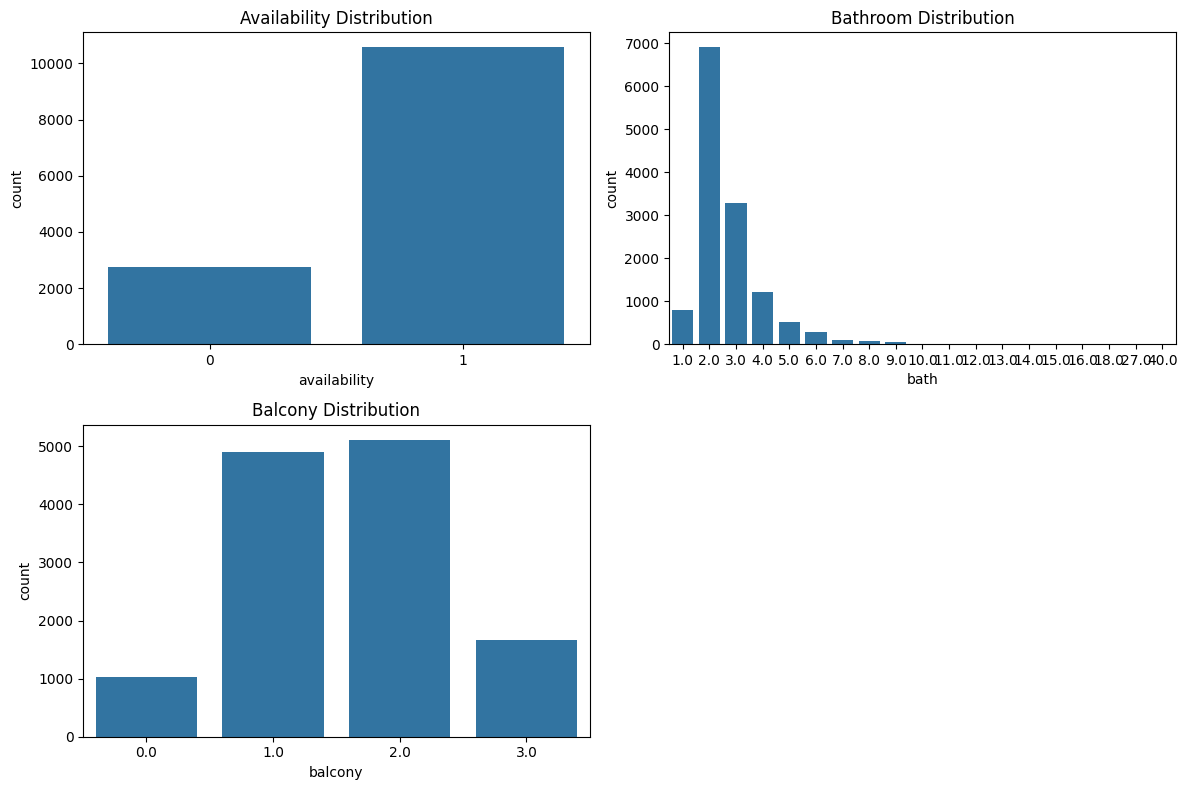

In [ ]:
# Create the bar plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='availability', data=df)
plt.title('Availability Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='bath', data=df)
plt.title('Bathroom Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='balcony', data=df)
plt.title('Balcony Distribution')

plt.tight_layout()
plt.show()

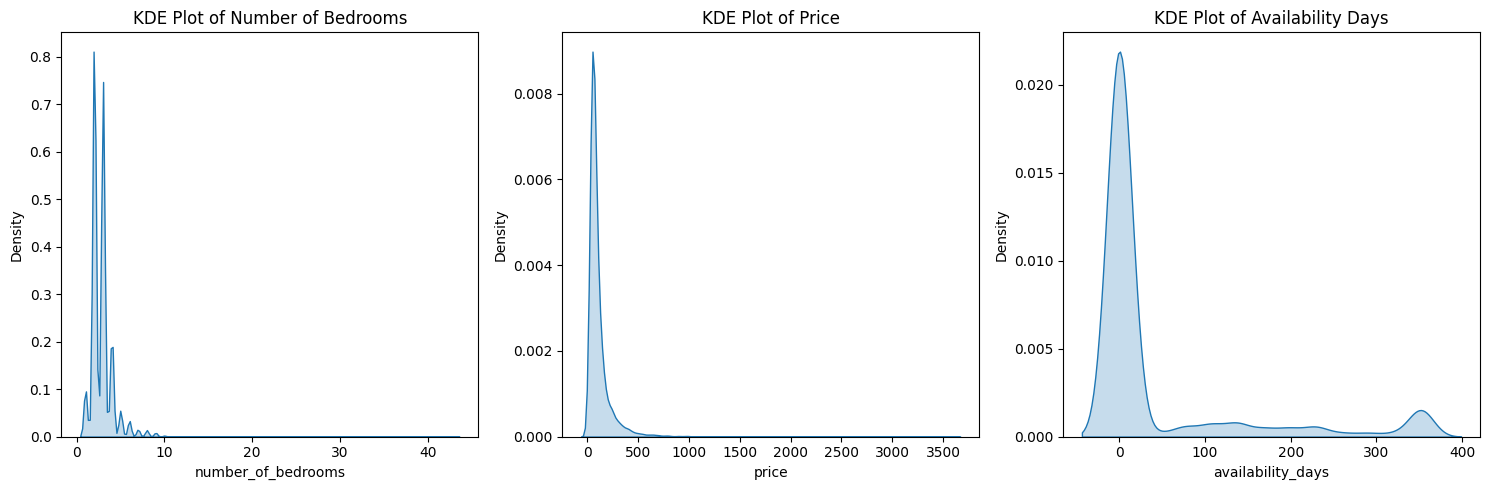

In [ ]:
# kde plot for number_of_bedrooms, price, availability_days.

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(df['number_of_bedrooms'], fill=True)
plt.title('KDE Plot of Number of Bedrooms')

plt.subplot(1, 3, 2)
sns.kdeplot(df['price'], fill=True)
plt.title('KDE Plot of Price')

plt.subplot(1, 3, 3)
sns.kdeplot(df['availability_days'], fill=True)
plt.title('KDE Plot of Availability Days')

plt.tight_layout()
plt.show()

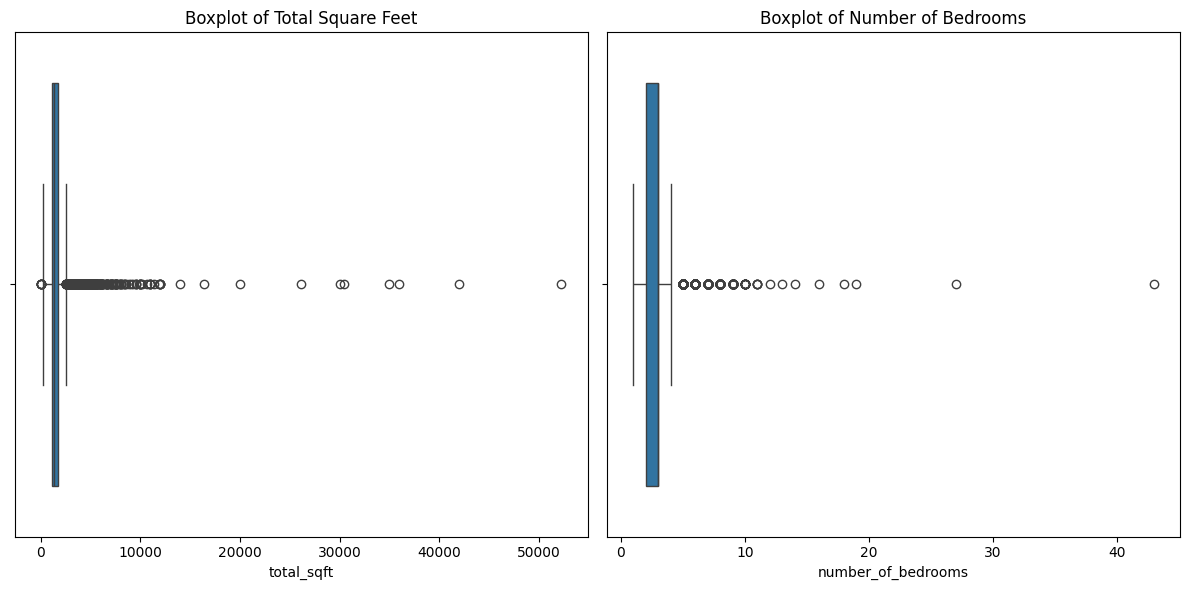

In [ ]:
# Create boxplots for 'total_sqft' and 'number_of_bedrooms'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['total_sqft'])
plt.title('Boxplot of Total Square Feet')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['number_of_bedrooms'])
plt.title('Boxplot of Number of Bedrooms')

plt.tight_layout()
plt.show()

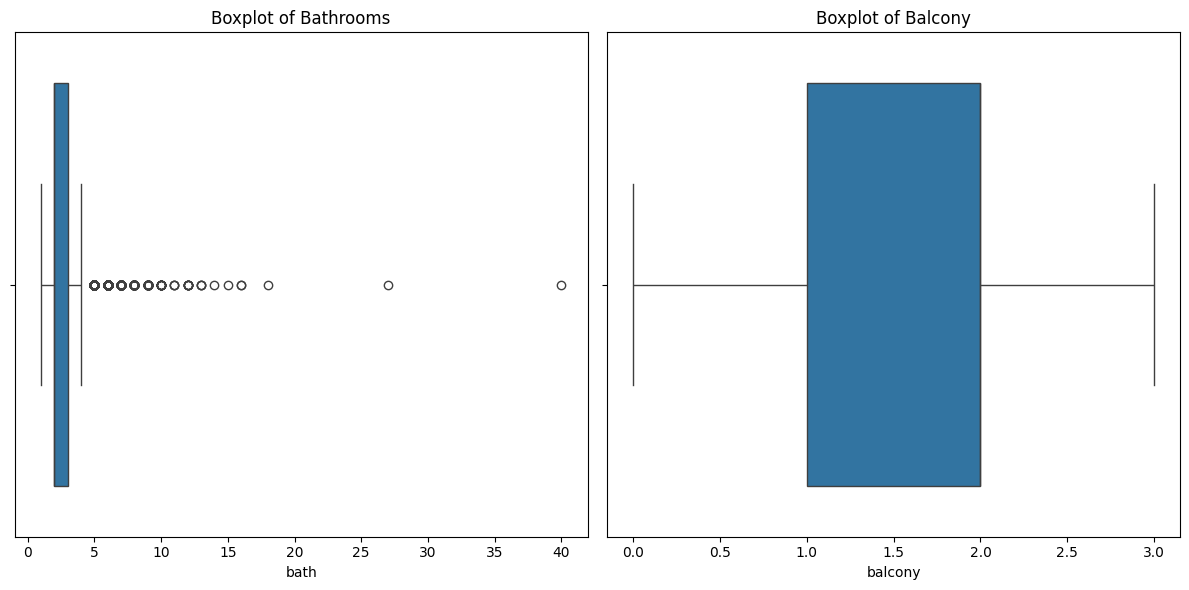

In [ ]:
# Create boxplots for 'bath' and 'balcony'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['bath'])
plt.title('Boxplot of Bathrooms')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['balcony'])
plt.title('Boxplot of Balcony')

plt.tight_layout()
plt.show()

- There are outliers present in the data
- Need to either clip them or remove them

## Handling Outliers

In [ ]:
# prompt: drop the outliers

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers for 'total_sqft', 'number_of_bedrooms', 'bath', 'balcony', and 'price'
df = remove_outliers_iqr(df, 'total_sqft')
df = remove_outliers_iqr(df, 'number_of_bedrooms')
df = remove_outliers_iqr(df, 'bath')
df = remove_outliers_iqr(df, 'balcony')
df = remove_outliers_iqr(df, 'price')

# Display the updated DataFrame
df.shape

(10428, 11)

In [ ]:
# prompt: clip the outlier from total_sqft, number_of_bedrooms, bath
"""
def clip_outliers(df, column, lower_percentile=0, upper_percentile=95):
    lower_bound = df[column].quantile(lower_percentile / 100)
    upper_bound = df[column].quantile(upper_percentile / 100)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Clip outliers for 'total_sqft', 'number_of_bedrooms', and 'bath'
df = clip_outliers(df, 'total_sqft')
df = clip_outliers(df, 'number_of_bedrooms')
df = clip_outliers(df, 'bath')"""

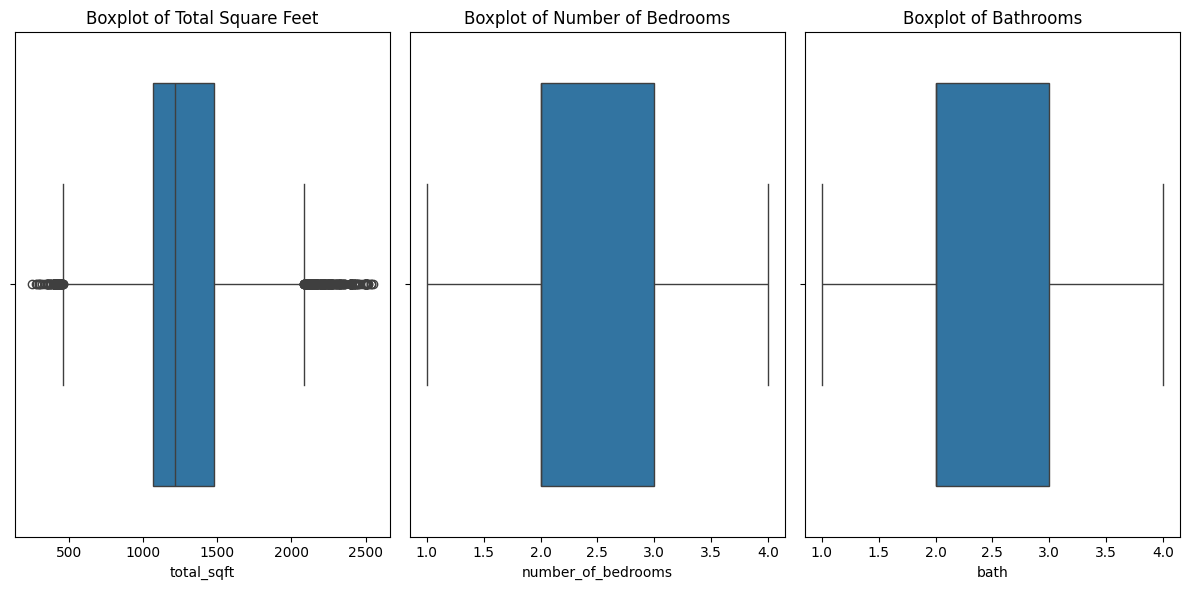

In [ ]:
# Create boxplots for 'total_sqft', 'number_of_bedrooms' and 'bath'

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['total_sqft'])
plt.title('Boxplot of Total Square Feet')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['number_of_bedrooms'])
plt.title('Boxplot of Number of Bedrooms')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['bath'])
plt.title('Boxplot of Bathrooms')

plt.tight_layout()
plt.show()

In [ ]:
#df['total_sqft'] = df['total_sqft'].clip(lower=df['total_sqft'].quantile(0.01), upper=df['total_sqft'].quantile(0.95))

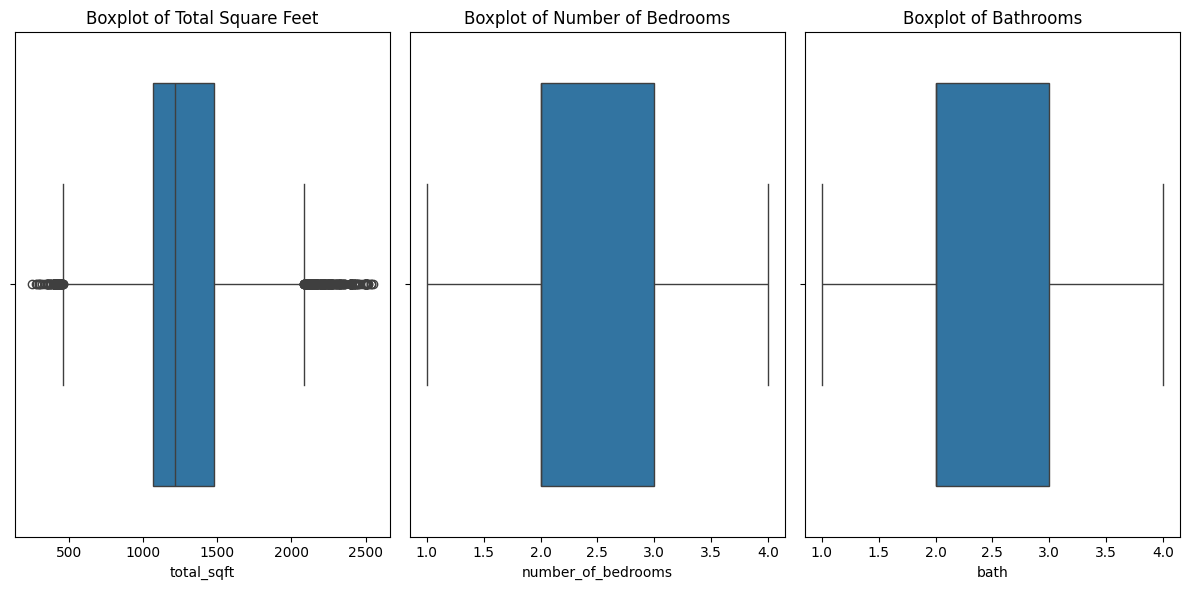

In [ ]:
# Create boxplots for 'total_sqft', 'number_of_bedrooms' and 'bath'
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['total_sqft'])
plt.title('Boxplot of Total Square Feet')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['number_of_bedrooms'])
plt.title('Boxplot of Number of Bedrooms')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['bath'])
plt.title('Boxplot of Bathrooms')

plt.tight_layout()
plt.show()

### Bivariate Analysis

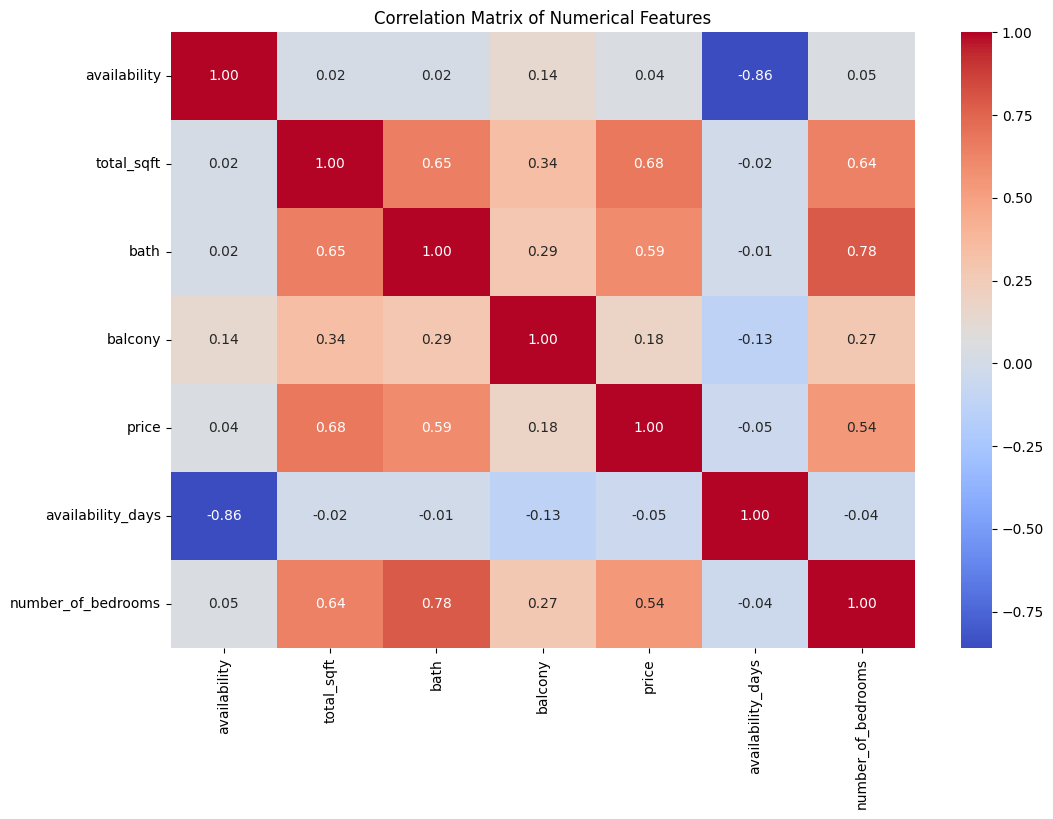

In [ ]:
# Calculate the correlation matrix, considering only numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<Figure size 1000x800 with 0 Axes>

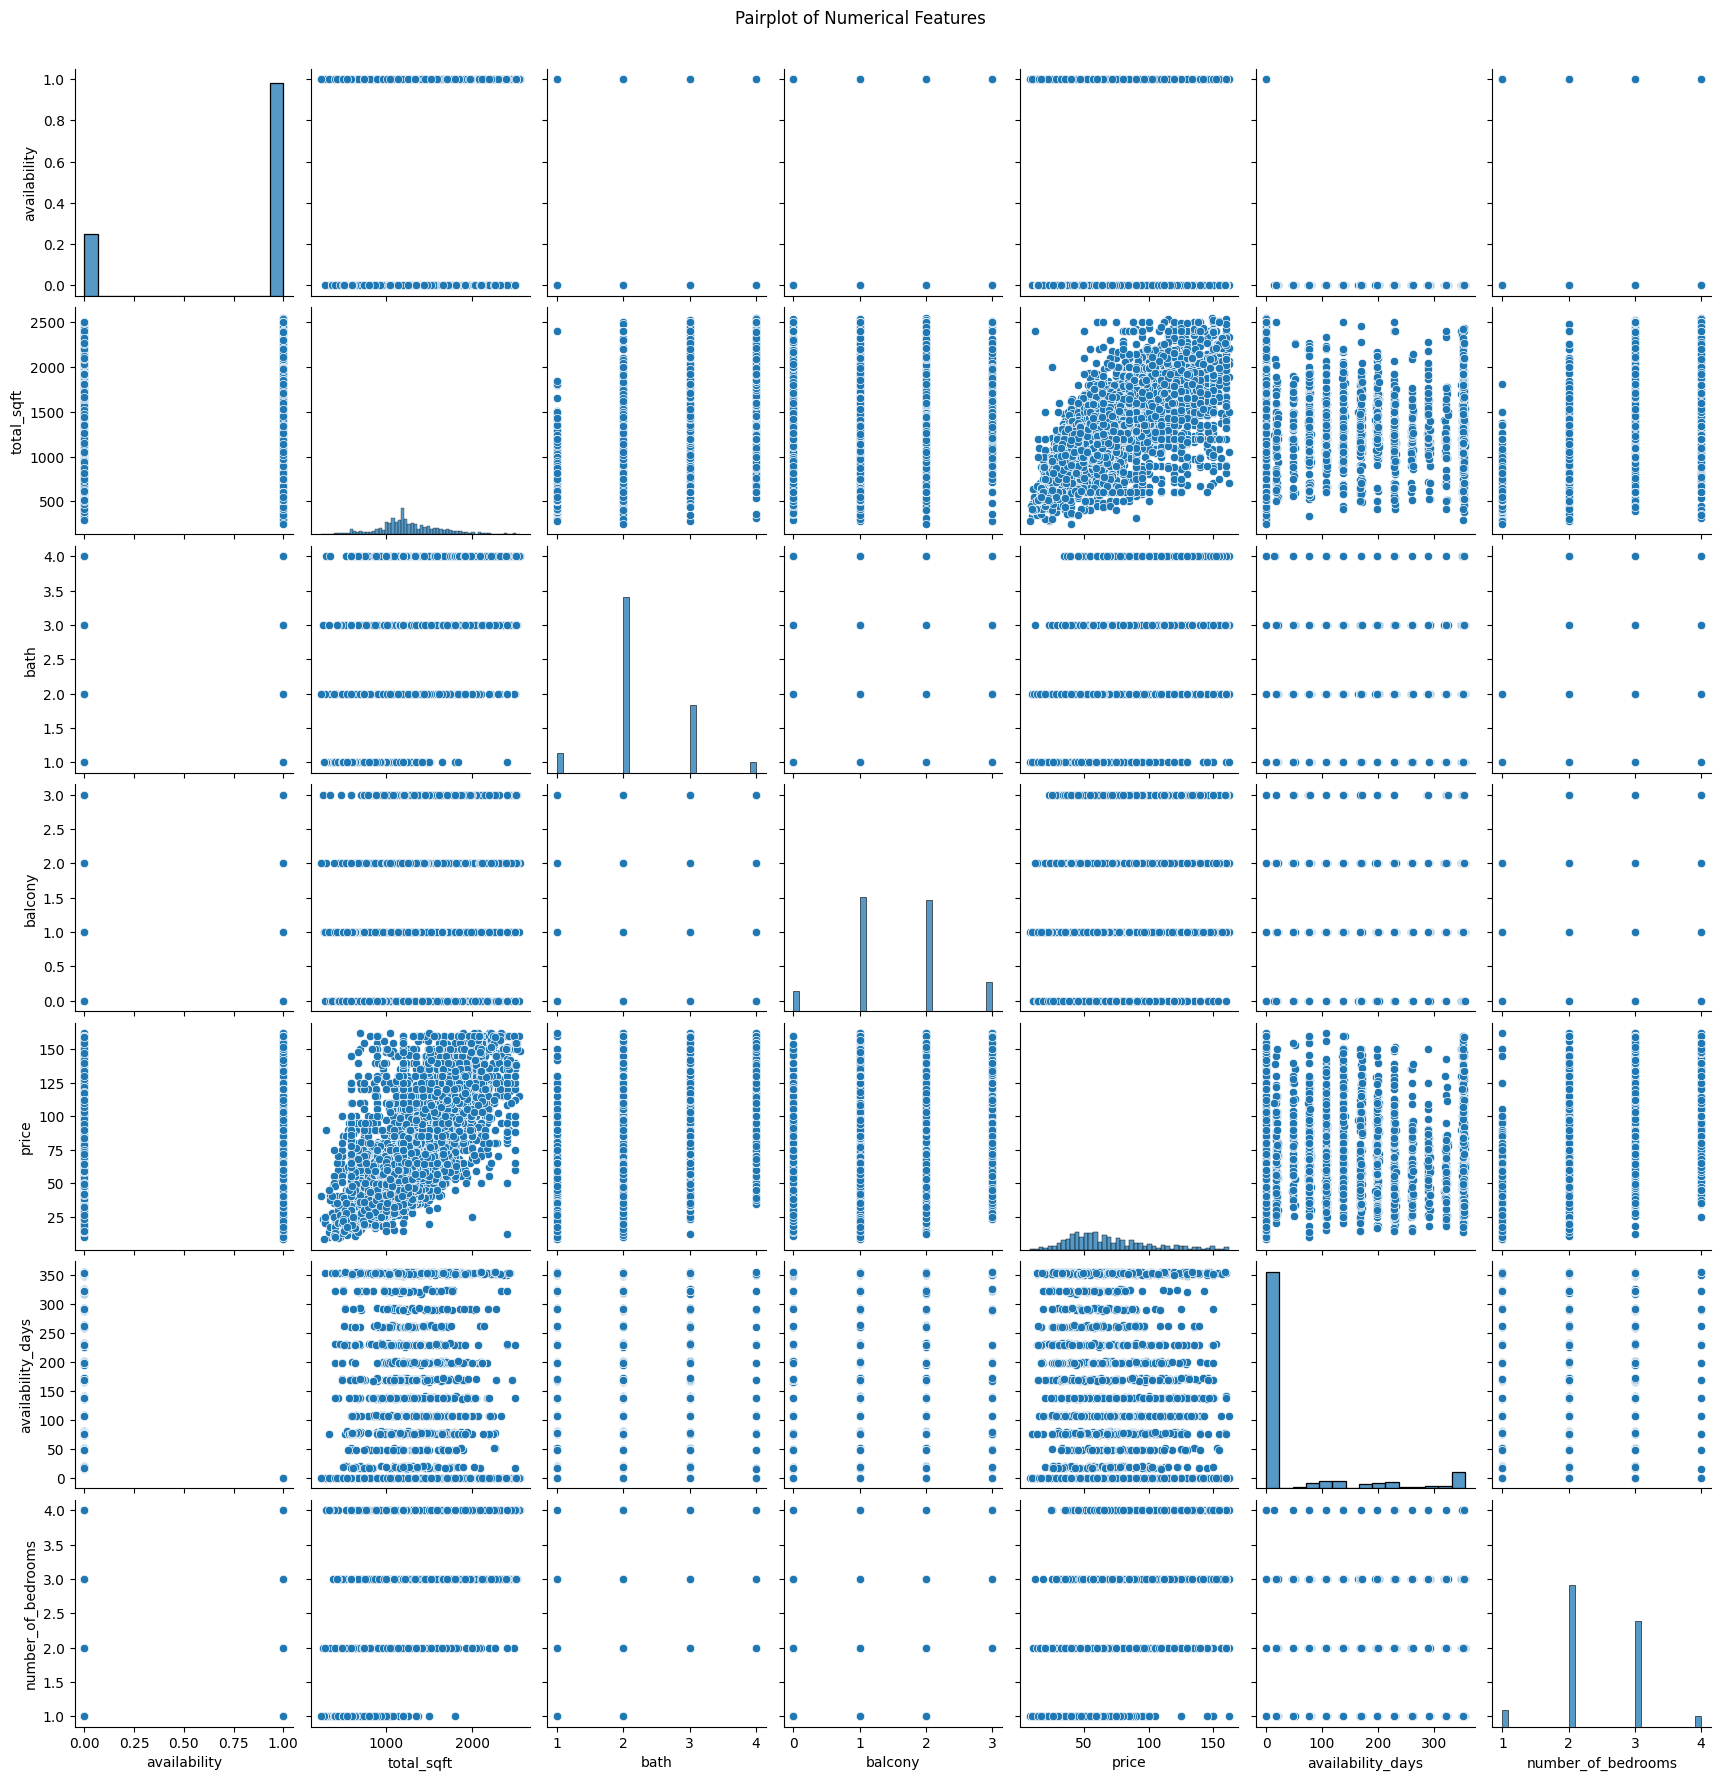

In [ ]:
# Assuming you want a pairplot of numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

### Handling missing values

In [ ]:
df.isnull().sum()/df.shape[0]

,0
availability,0.000000
total_sqft,0.000000
bath,0.000000
balcony,0.000000
price,0.000000
site_location,0.000096
availability_days,0.000000
number_of_bedrooms,0.000000
Carpet Area,0.000000
Plot Area,0.000000


In [ ]:
# Groupby imputation for 'bath' and 'balcony' based on 'number_of_bedrooms'
# df['bath'] = df.groupby('number_of_bedrooms')['bath'].transform(lambda x: x.fillna(x.median()))
# df['balcony'] = df.groupby('number_of_bedrooms')['balcony'].transform(lambda x: x.fillna(x.median()))
# df.isnull().sum()

In [ ]:
# now dropiing the Missing value as no of bedroom is importnat paramter for testing the price

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
availability,0
total_sqft,0
bath,0
balcony,0
price,0
site_location,0
availability_days,0
number_of_bedrooms,0
Carpet Area,0
Plot Area,0


## 5. Data Splitting

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

Calculating VIF score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the numerical features from the preprocessed dataframe (X)
numerical_features = X.select_dtypes(include=np.number)


# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

vif_data

,feature,VIF
0,availability,8.441509
1,total_sqft,25.206842
2,bath,37.796091
3,balcony,5.742958
4,availability_days,2.571262
5,number_of_bedrooms,39.324757


In [ ]:
# Drop the 'number_of_bedrooms' column from the DataFrame 'X'
X.drop('number_of_bedrooms', axis='columns', inplace=True)

In [ ]:
# Get the numerical features from the preprocessed dataframe (X)
numerical_features = X.select_dtypes(include=np.number)


# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

vif_data

,feature,VIF
0,availability,8.128036
1,total_sqft,22.731808
2,bath,21.736423
3,balcony,5.736944
4,availability_days,2.523371


In [ ]:
X.drop('bath', axis=1, inplace=True)

In [ ]:
# Get the numerical features from the preprocessed dataframe (X)
numerical_features = X.select_dtypes(include=np.number)


# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

vif_data

,feature,VIF
0,availability,7.457139
1,total_sqft,10.966327
2,balcony,5.659231
3,availability_days,2.358390


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Target encoding

In [ ]:
# Calculate the mean target value for each category in the training set
site_location_target_encoding = y_train.groupby(X_train['site_location']).mean()

# Map the target encoding to the training and testing sets
X_train['site_location_encoded'] = X_train['site_location'].map(site_location_target_encoding)
X_test['site_location_encoded'] = X_test['site_location'].map(site_location_target_encoding)

# Drop the original 'site_location' column
X_train.drop('site_location', axis=1, inplace=True)
X_test.drop('site_location', axis=1, inplace=True)


In [ ]:
X_train.head()

,availability,total_sqft,balcony,availability_days,Carpet Area,Plot Area,Super built-up Area,site_location_encoded
12148,1,1330.0,2.0,0,False,False,True,71.993687
5535,1,1198.0,1.0,0,False,False,True,72.241412
9451,1,1245.0,1.0,0,False,True,False,73.469355
6575,1,900.0,1.0,0,False,False,True,67.834080
9263,1,1105.0,1.0,0,False,False,True,67.834080


## Scaling

In [ ]:
# prompt: perform a standard scaler on X_train and X_test

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test = scaler.transform(X_test)


## 6. Model selection

- Will use linear regression
- In acutual you will try multiple model

## 7. Model Training

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## 8. Model Evaluation

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 16.292597342058
Mean Squared Error (MSE): 459.9609603500226
Root Mean Squared Error (RMSE): 21.446700453683373
R-squared (R2): 0.5296949268284923


## 9. Parameter Tuning - regulerization

In [ ]:
# prompt: use elastic net with greed search

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
param_grid = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9]  # Mixing parameter (0 for L2, 1 for L1)
}

# Create an ElasticNet model
elastic_net = ElasticNet()

# Create a GridSearchCV object
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_elastic_net = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_elastic_net.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Mean Absolute Error (MAE): 16.31318950430893
Mean Squared Error (MSE): 460.5233930467196
Root Mean Squared Error (RMSE): 21.45980878402041
R-squared (R2): 0.5291198455207813


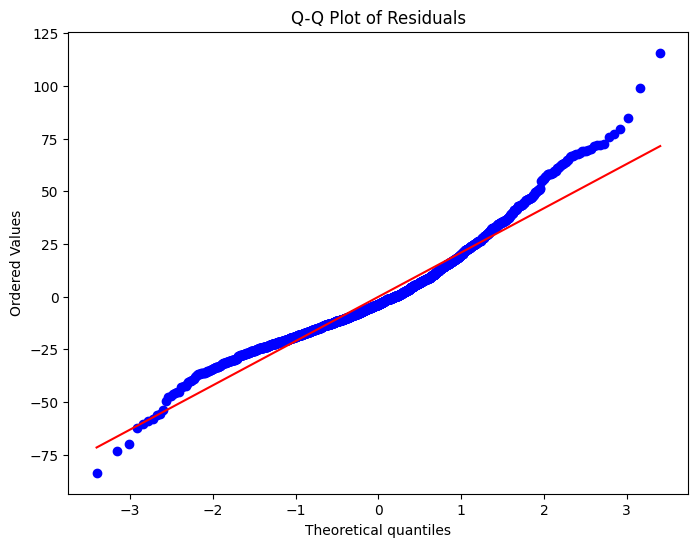

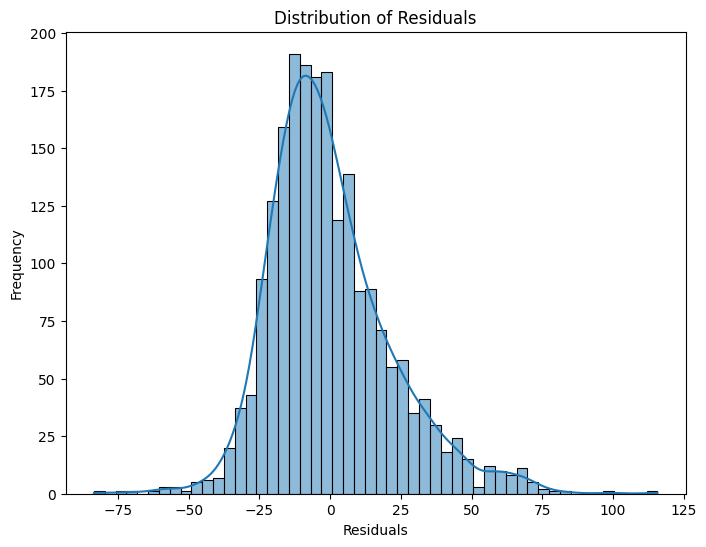

In [ ]:
# prompt: plot normality of residual

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate residuals
residuals = y_test - y_pred

# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

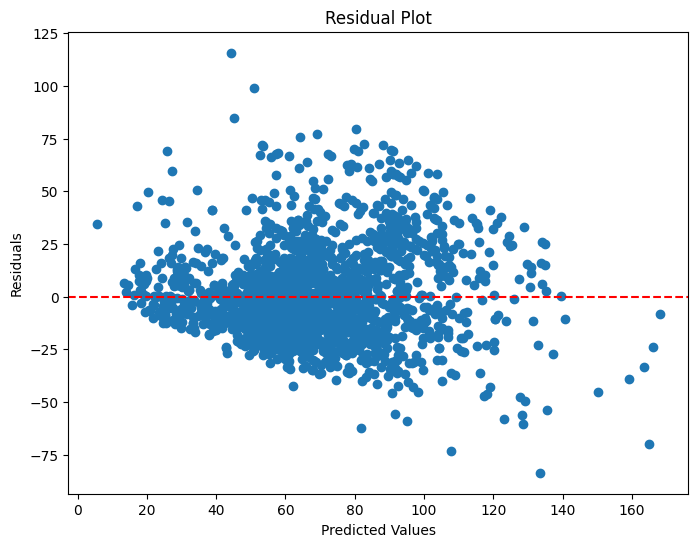

In [ ]:

# Check for heteroscedasticity using a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
}
results = []

for name, model in models.items():
    predict=cross_val_predict(model,X_train,y_train,cv=3)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_train, predict)
    mse = mean_squared_error(y_train, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, predict)

    results.append({
        "Model Name": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    })

results_df = pd.DataFrame(results)


results_df



,Model Name,MAE,MSE,RMSE,R² Score
0,Linear Regression,16.276444,465.781418,21.581970,0.524765
1,Random Forest,15.688361,456.786478,21.372564,0.533943
2,Gradient Boosting,15.105723,407.334293,20.182524,0.584399
3,Decision Tree,20.182811,794.878041,28.193582,0.188990
4,SVM,15.636978,454.734225,21.324498,0.536037


## Insights
### 1. Data Cleaning
- Check for missing values: Missing values are cheked and imputed with groupby imput, Higher missig value column is dropped
- Different size of bedroom are converted to numerical data


### 2. Data Manipulation
- Converted 'availability' to two values: 'Ready To Move' or 'Not Ready'
- one-hot encoding to 'area_type'
- Target encoding is performed on 'site_location' and is done after test train split to avoid data lekage

### 3. Data Visualization
- Distributions: Use histograms, box plots, or density plots to visualize the distribution of features and the target variable.

### 4. Training Accuracy
- Evaluate training accuracy: Check performance using metrics like R² or Mean Squared Error (MSE) on the training data.

### 5. Testing Accuracy
- Evaluate on testing data: After training, test the model on the hold-out test set. Use performance metrics like R², MSE, or Root Mean Squared Error (RMSE) to assess how well the model predicts unseen data.
- L2 regulerization, Cross-validation, Hyperparameter tuning is used to avoid overfitting
